In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the dataset
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Task 1: Exploratory Data Analysis (EDA)

In [3]:
# Basic exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

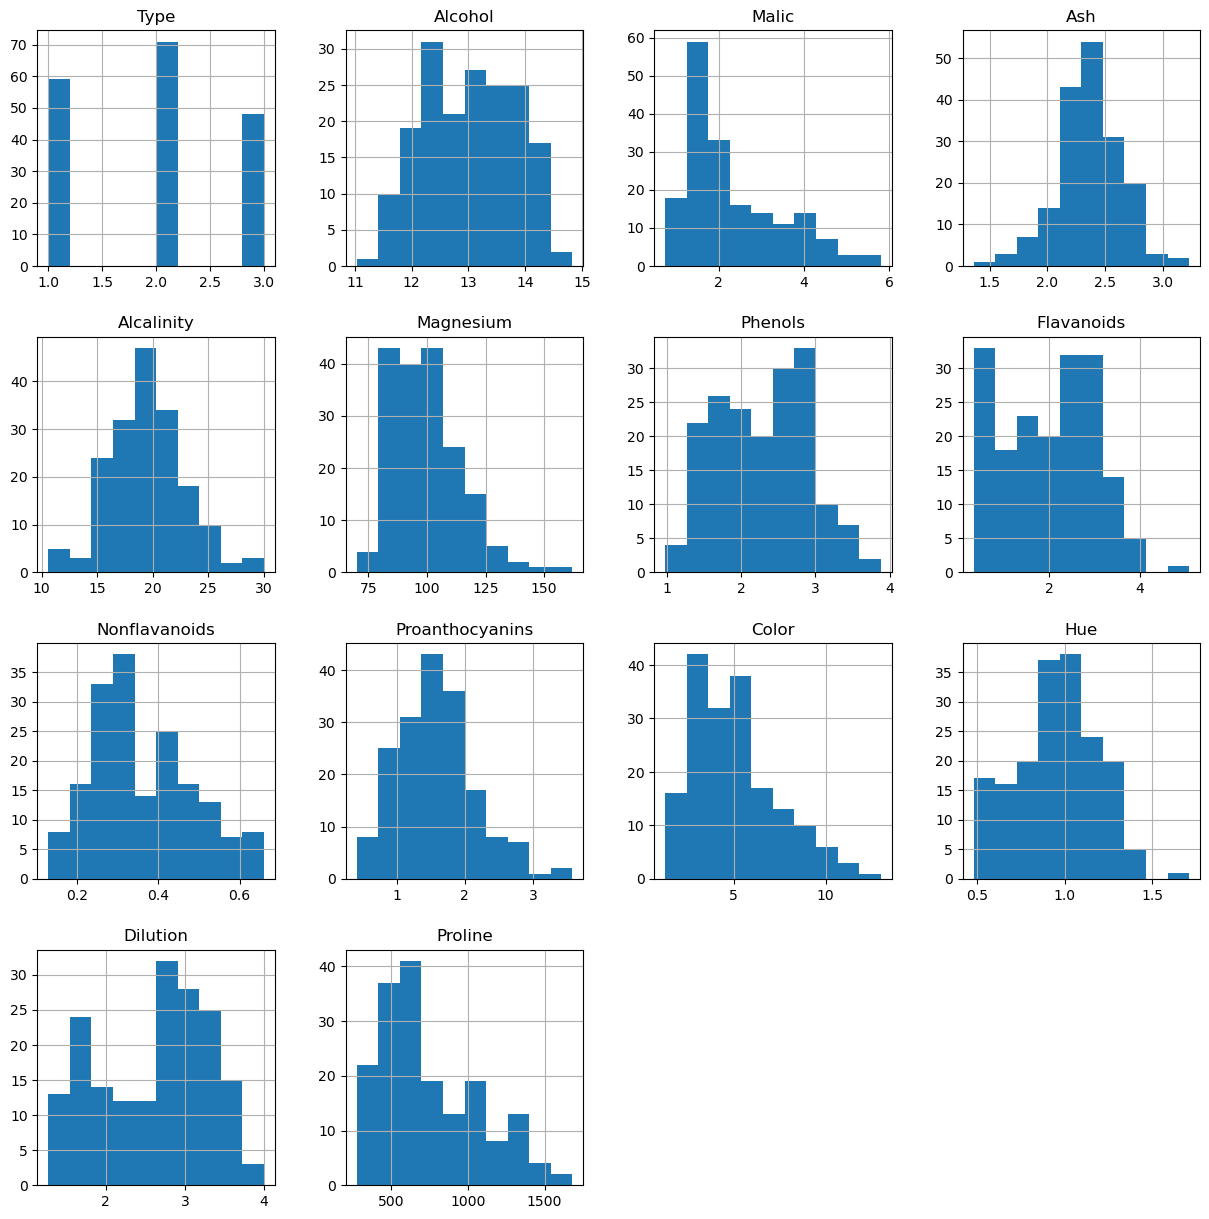

In [4]:
# Distribution of features
df.hist(figsize=(15, 15))
plt.show()

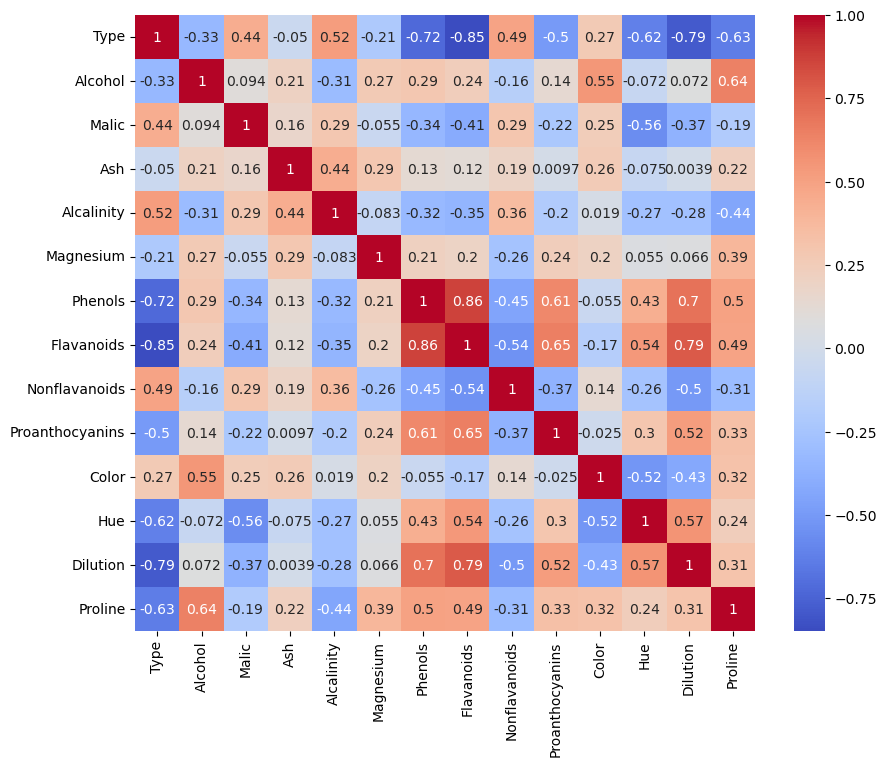

In [5]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Task 2: Dimensionality Reduction with PCA

In [6]:
# Standardization
scaler = StandardScaler()
scaler

StandardScaler()

In [7]:
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
# PCA
pca = PCA()
pca

PCA()

In [9]:
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

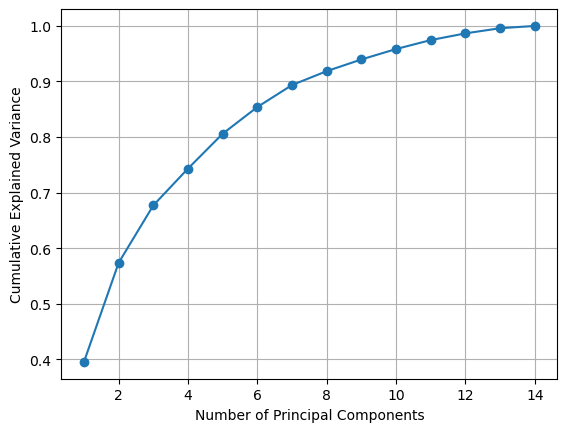

In [10]:
# Scree plot
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [11]:
# Select optimal number of components (e.g., 2)
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [12]:
pca_data_2d = pca.fit_transform(scaled_data)
pca_data_2d

array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309],
       [-3.28812981,  2.13017513],
       [-2.75057754,  1.17916999],
       [-2.39286652,  1.61128232],
       [-2.79525633,  0.92317952],
       [-3.00559666,  0.79628417],
       [-3.67868855,  1.31252342],
       [-2.10963477,  0.61298199],
       [-2.43845636,  0.67852331],
       [-3.67349453,  1.14012136],
       [-4.44157575,  2.11031917],
       [-2.60892387,  1.66641801],
       [-2.47542846,  2.33089672],
       [-2.22623243,  1.63359016],
       [-3.74226929,  2.52840527],
       [-2.3944115 ,  1.06452946],
       [-3.33656895,  0.79601279],
       [-1.48140399,  0.24008547],
       [-2.82806867, -0.08685755],
       [-2.00771405, -0.51561649],
       [-2.11463604, -0.31592057],
       [-1.39753751,  0.93821529],
       [-2.13348803,  0.68710205],
       [-1.62970383, -0.09118403],
       [-2.50760753,

# Task 3: Clustering with Original Data

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [14]:
labels_original = kmeans.fit_predict(scaled_data)
labels_original

C:\Users\Kruthika M\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

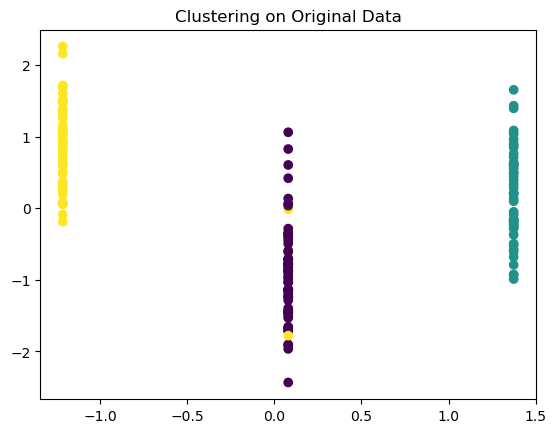

In [15]:
# Visualize clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_original, cmap='viridis')
plt.title('Clustering on Original Data')
plt.show()

In [16]:
# Evaluate clustering
silhouette_original = silhouette_score(scaled_data, labels_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, labels_original)
print("Silhouette Score (Original):", silhouette_original)
print("Davies-Bouldin Index (Original):", davies_bouldin_original)

Silhouette Score (Original): 0.30648398324833453
Davies-Bouldin Index (Original): 1.315707552261773


# Task 4: Clustering with PCA Data

In [17]:
labels_pca = kmeans.fit_predict(pca_data_2d)
labels_pca

C:\Users\Kruthika M\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

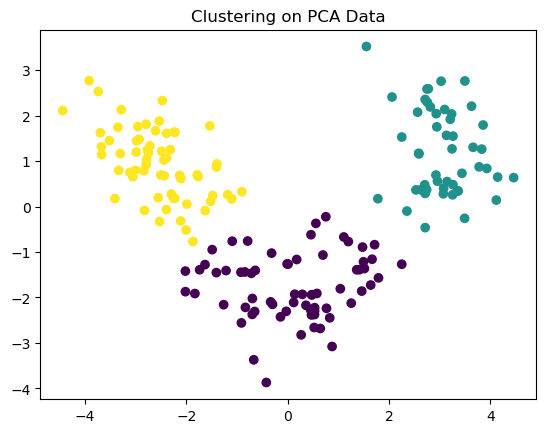

In [18]:
# Visualize clustering
plt.scatter(pca_data_2d[:, 0], pca_data_2d[:, 1], c=labels_pca, cmap='viridis')
plt.title('Clustering on PCA Data')
plt.show()

In [19]:
# Evaluate clustering
silhouette_pca = silhouette_score(pca_data_2d, labels_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data_2d, labels_pca)
print("Silhouette Score (PCA):", silhouette_pca)
print("Davies-Bouldin Index (PCA):", davies_bouldin_pca)

Silhouette Score (PCA): 0.6024415520362844
Davies-Bouldin Index (PCA): 0.5397078562575711


# Task 5: Comparison and Analysis

In [20]:
if silhouette_pca > silhouette_original:
    print("PCA clustering performs better based on Silhouette Score.")
else:
    print("Original data clustering performs better based on Silhouette Score.")

PCA clustering performs better based on Silhouette Score.


In [21]:
if davies_bouldin_pca < davies_bouldin_original:
    print("PCA clustering performs better based on Davies-Bouldin Index.")
else:
    print("Original data clustering performs better based on Davies-Bouldin Index.")

PCA clustering performs better based on Davies-Bouldin Index.


# Task 6: Conclusion and Insights

In [22]:
print("\nConclusion and Insights:")
print("1. PCA helps reduce dimensionality while retaining important information, improving clustering performance.")
print("2. The clustering results on PCA-transformed data showed a higher Silhouette Score and lower Davies-Bouldin Index, indicating better-defined clusters.")
print("3. PCA reduces noise and redundancy, making clustering more efficient.")
print("4. For datasets with high dimensionality, applying PCA before clustering can improve accuracy and efficiency.")
print("5. However, when the original data already has well-separated clusters, PCA may not significantly improve performance.")


Conclusion and Insights:
1. PCA helps reduce dimensionality while retaining important information, improving clustering performance.
2. The clustering results on PCA-transformed data showed a higher Silhouette Score and lower Davies-Bouldin Index, indicating better-defined clusters.
3. PCA reduces noise and redundancy, making clustering more efficient.
4. For datasets with high dimensionality, applying PCA before clustering can improve accuracy and efficiency.
5. However, when the original data already has well-separated clusters, PCA may not significantly improve performance.
